# Logistic Regression
Data Mining Lab5, UVic Spring 2023 <br><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br><br> (Sci-kit learn documenation: Logistic Regression) <br><br>

Linear regression gives you a continuous output, but logistic regression provides a constant output. An example of the continuous output is house price and stock price. Examples of the discrete output is predicting whether a patient has cancer or not. Linear regression is estimated using Least Squares while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.

- Likelihood function can be expressed as a product of the Bernoulli distributions for each observation in the dataset
- Note that logistic regression is a linear model (linear relationship between input variables and target variables) even though the sigmoid function is a nonlinear function.

<img src='LinearvsLogistic.png'>
<br><br>
Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

It is a special case of linear regression where the target variable is categorical in nature. 

Linear regression equation: 

$$y = \beta_0 + \beta_1 X_1 + \beta_2X_2 + \dots \beta_n X_n$$

Logsitic Regression (sigmoid): 

$$P = \frac{1}{1+e^{-y}}$$



In [1]:
# import library 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# without above line matplotlib will not work in notebook
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"] 
x, y = datasets.load_iris(return_X_y=True)
df = pd.DataFrame(x, columns = feature_names)
df['target'] = y
print(df.head())
print(np.unique(y))

df = df[df['target'] != 2]

y = df['target']

x = df[feature_names]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0
[0 1 2]
(67, 4)
(33, 4)


Regularization parameter: C — float, default = 1. Smaller values have more regularization. Inverse of regularization strength. Must be positive value. Usually search logarithmically: [.001, .01, .1, 1, 10, 100, 1000]

Weaker regularization vs stronger regularization

L1 (lasso) - adds penalty term proportional to absolute value of model coeff
L2 (ridge) - adds penalty term proportional to square of the model coeff


In [14]:
model = LogisticRegression(C=1e5, multi_class="multinomial", solver="lbfgs", penalty="l2")
# remember that small value of C implies stronger regularization
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
print(y_test.values)

[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 1]


Evaluating the performance of the model:

Accuracy: 1.0


<AxesSubplot:>

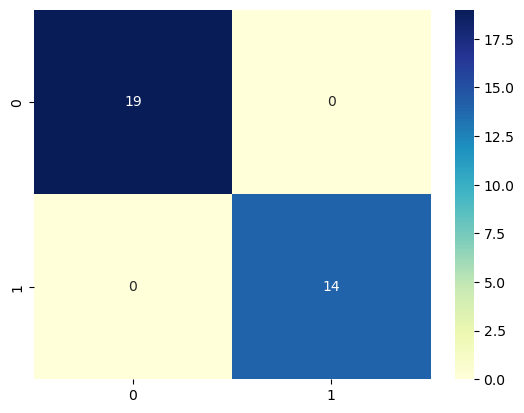

In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

import seaborn as sns
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix,annot = True,fmt='g',cmap="YlGnBu")

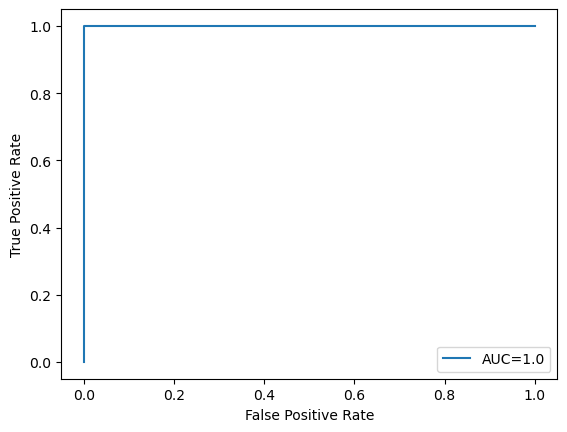

In [17]:
from sklearn import metrics
prob = model.predict_proba(X_test)

fpr, tpr, _ = metrics.roc_curve(y_test,  prob[:,1])
auc = metrics.roc_auc_score(y_test, prob[:,1])


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


## Odds Ratio (OR)

In this part I will explain the importance of features using logsitic regression. We already know that 

$$P(Y=1|X=x,w) = \frac{\exp(<w,x>)}{1 + \exp(<w,x>)}$$
$$P(Y=0|X=x,w) = \frac{1}{1 + \exp<(w,x)>}$$

So $\frac{P(Y=1)}{P(Y=0)} = \exp <(w,x)>$. we call the left side of this equation odds. Let’s focus on a specific feature. E.g. x3. What happens to prediction when you make a change on x3 by 1 unit. I mean that I will change x3 to (x3 + 1). 

$$odd_{x3 -> x3+1}/odd = e^{w_0 + w_1x_1 + w_2x_2 + w_3(x_3 + 1) + w_4x_4}/e^{w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4} = e^{w_3}$$ 

So, if we increase the $x_3$ feature one unit, then the prediction will change e to the power of its weight. We can apply this rule to the all weights to find the feature importance.

In order words, OR is a measure of the association between a binary outcome variable and one or more predictor variables. 

More information: https://online.stat.psu.edu/stat462/node/207/


In [18]:
from sklearn.datasets import load_iris
import pandas as pd

 
feature_nameses = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
 
x, y = load_iris(return_X_y=True)
df = pd.DataFrame(x, columns = feature_names)
df['target'] = y
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [19]:
#0: setosa, 1: versicolor, 2: virginica
# Dropping virginica class to make it a binary classification problem
df = df[df['target'] != 2]

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0).fit(df[feature_names].values, df['target'].values)
 
score = model.score(df[feature_names].values, df['target'].values)
print(score)

1.0


Violinplot is useful for identifying distributions of the variables. Combination of a boxplot and a kernel density plot.

<AxesSubplot:xlabel='target', ylabel='petal_width'>

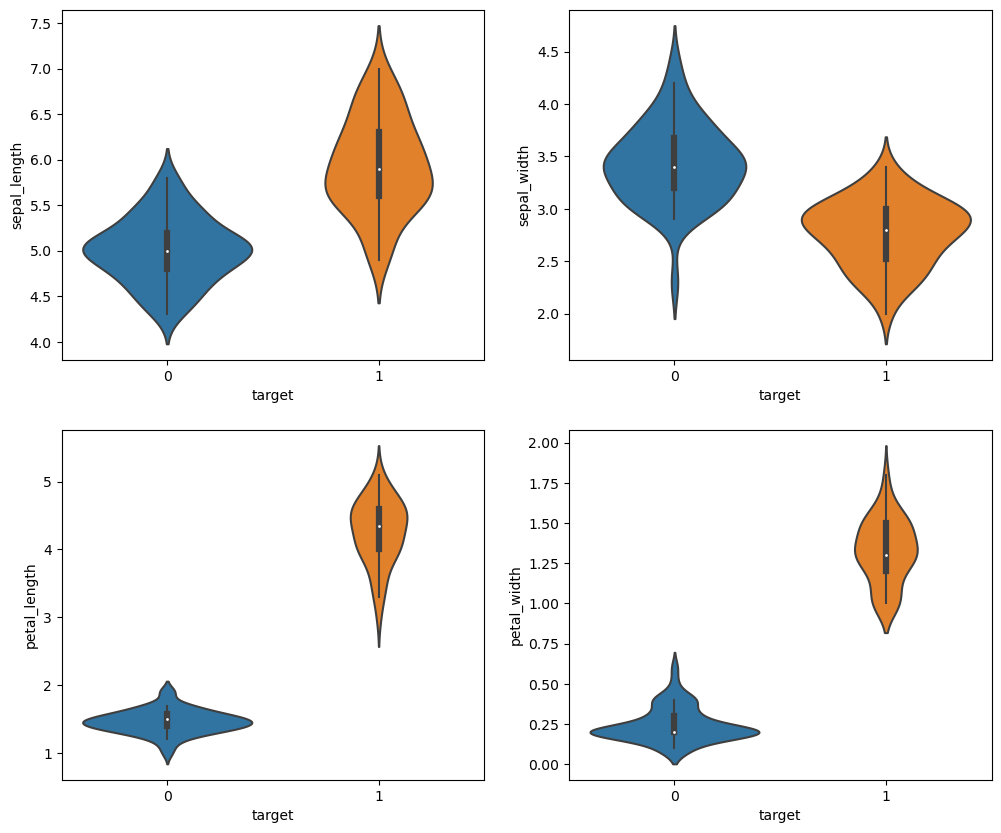

In [21]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.violinplot(x="target",y="sepal_length",data=df)
plt.subplot(2,2,2)
sns.violinplot(x="target",y="sepal_width", data=df)
plt.subplot(2,2,3)
sns.violinplot(x="target", y="petal_length",data=df)
plt.subplot(2,2,4)
sns.violinplot(x="target",y="petal_width",data=df)


In [22]:
w0 = model.intercept_[0]
w = w1, w2, w3, w4 = model.coef_[0]
 
equation = "y = %f + (%f * x1) + (%f * x2) + (%f * x3) + (%f * x4)" % (w0, w1, w2, w3, w4)
print(equation)

y = -6.611651 + (0.440365 * x1) + (-0.906968 * x2) + (2.308496 * x3) + (0.962328 * x4)


In [23]:
import math
def sigmoid(x):
    return 1 / (1 + pow(math.e, -x))
 
result = 0
result += w0
for i in range(0, 4):
    result += x[i] * w[i]
result = sigmoid(result)
print(result)

[0.99844807 0.92950583 0.05623382 0.00235042]


<AxesSubplot:xlabel='target', ylabel='petal_width'>

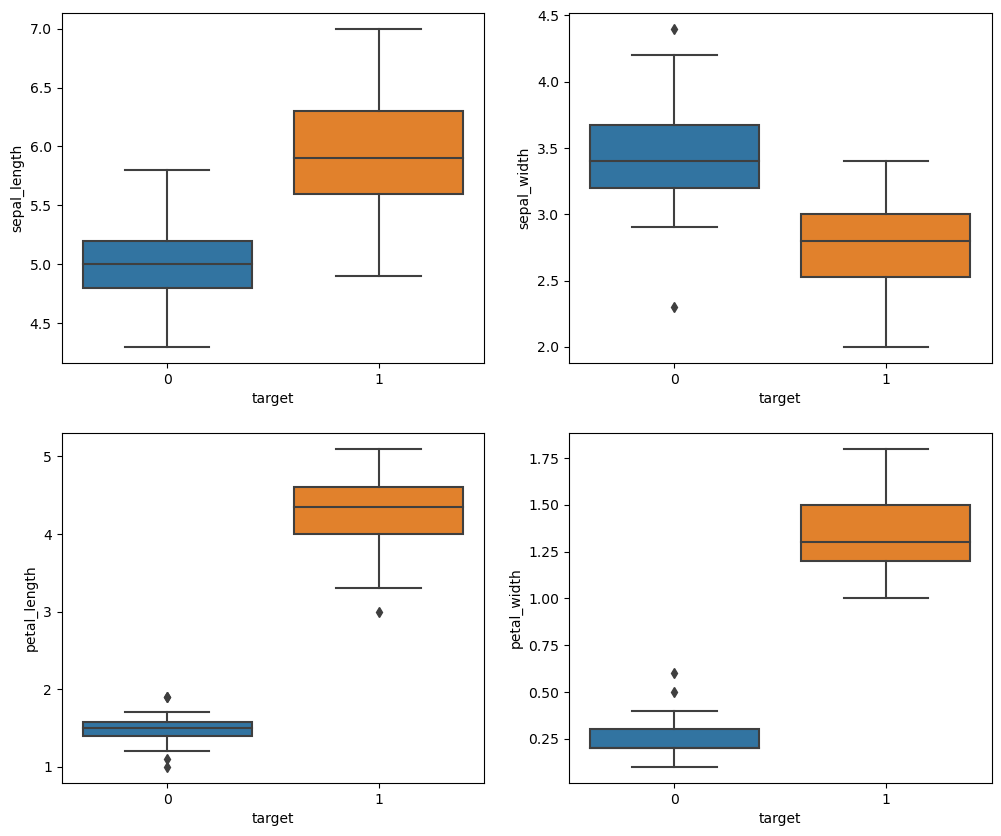

In [24]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="target",y="sepal_length",data=df)
plt.subplot(2,2,2)
sns.boxplot(x="target",y="sepal_width", data=df)
plt.subplot(2,2,3)
sns.boxplot(x="target", y="petal_length",data=df)
plt.subplot(2,2,4)
sns.boxplot(x="target",y="petal_width",data=df)


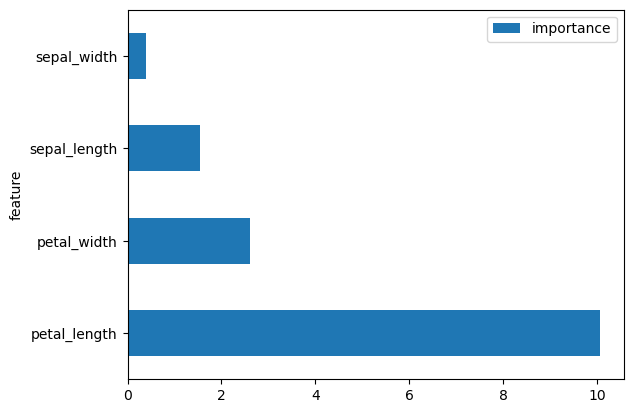

In [25]:
feature_importance = pd.DataFrame(feature_names, columns = ["feature"])
feature_importance["importance"] = pow(math.e, w)
feature_importance = feature_importance.sort_values(by = ["importance"], ascending=False)
 
from sklearn.linear_model import LogisticRegression
ax = feature_importance.plot.barh(x='feature', y='importance')
plt.show()
